In [8]:
import os
import PyPDF2
import fitz

In [9]:
from nltk import tokenize
# import nltk
# nltk.download('punkt')

In [10]:
dir = 'annoted_sustainability_reports/Energy/'


In [11]:
highlight_list = []
rel_text = []

for file in os.listdir(dir):
    f = os.path.join(dir, file)
    print(f)

    doc = fitz.open(f)
    print(doc)
    result = []
    
    for page in doc:

        highlights = []
        annot = page.first_annot
        while annot:
            if annot.type[0] == 8:
                all_coordinates = annot.vertices
                try:
                    if len(all_coordinates) == 4:
                        highlight_coord = fitz.Quad(all_coordinates).rect
                        highlights.append(highlight_coord)
                    else:
                        all_coordinates = [all_coordinates[x:x+4] for x in range(0, len(all_coordinates), 4)]
                        for i in range(0,len(all_coordinates)):
                            coord = fitz.Quad(all_coordinates[i]).rect
                            highlights.append(coord)
                except:
                    print("NoneType found")
            annot = annot.next

        all_words = page.get_text_words()
        highlight_text = []
        if len(highlights) > 0:
            for h in highlights:
                sentence = []
                for w in all_words:
                    if fitz.Rect(w[0:4]).intersects(h):
                        sentence.append(w[4])
                highlight_text.append(" ".join(sentence))
        if len(highlight_text) > 0:
            result.append(" ".join(highlight_text))
        

    s = ""
        
    for r in result:
        if r is not None:
            s += r
        
    #create array of highlighted sentences in the pdf
#     highlighted_sentences = s.split('.')
    highlighted_sentences = tokenize.sent_tokenize(s)

    print(highlighted_sentences, "\n", len(highlighted_sentences))

    rel_text.append(highlighted_sentences)

    num_highlighted = len(highlighted_sentences)

    highlight_list.append(num_highlighted)

annoted_sustainability_reports/Energy/Total_2022_Sustainability_report.pdf
Document('annoted_sustainability_reports/Energy/Total_2022_Sustainability_report.pdf')
NoneType found
['We affirm our ambitious target of a more than 30% reduction in greenhouse gas emissions related to sales of petroleum prod- ucts (Scope 3 Oil) by 2030 compared to 2015.', 'To that, we add phased targets for reducing methane emissions (50% from 2020 levels by 2025 and 80% from 2020 levels by 2030) to move towards zero methane and an objective of less than 0.1 million cubic meters per day for routine gas flaring at our operated assets by 2025, before eliminating flaring com- pletely by 2030.otalEnergies is reducing the share of petro- leum products in its sales mix, from 65% in 2015 to 44% in 2021 (excluding the impact of Covid-19), and a targeted 30% in 2030.The Company aims to produce 2\xa0TWh per year of biomethane starting in 2025 and over 5\xa0TWh per year by 2030 worldwide.', 'In early 2021, TotalEnergies 

['Our ambition is to be a net zero company by 2050 or sooner, and to help the world get to net zero.', 'For aim 1, which encompasses our Scope 1 and 2 emissions from our operations, we now aim to reduce emissions by 50% by 2030, compared with our previous aim of 30-35%, on the way to being net zero by 2050 or sooner.', 'For aim 3, we are aiming to reduce to net zero the lifecycle emissions for energy products we sell by 2050 or sooner – up from the previous aim of a 50% reduction in their average emissions intensity.', 'This aim now includes physically traded energy products and marketed sales.', 'For 2030 we are now aiming for a 15- 20% reduction in the lifecycle carbon intensity of these products against the 2019 baseline.Divestments are, and continue to be, an important part of our strategy.', 'They enable us to strengthen our balance sheet and high-grade or diversify our portfolio.', 'They will also help bp to create a resilient, lower cost and lower carbon oil, gas and refining po

In [12]:
#Extracting all sentences from the file
sentences_list = []
all_text = []

for file in os.listdir(dir):
    f = os.path.join(dir, file)
    print(f)

    pdfFileObj = open(f, 'rb') 
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 

    t = ""

    for count in range(len(fitz.open(f))):
        # print(count)
        pageObj = pdfReader.getPage(count)
        t += pageObj.extractText()
        

    pdfFileObj.close() 
#     total_sentences = t.split('.')
    total_sentences = tokenize.sent_tokenize(t)
    print(len(total_sentences))

    all_text.append(total_sentences)

    num_sentences = len(total_sentences)

    sentences_list.append(num_sentences)

#1910 total sentences in Amazon_2021_sustainability_report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


annoted_sustainability_reports/Energy/Total_2022_Sustainability_report.pdf
1300
annoted_sustainability_reports/Energy/BP_2021_Sustainability_report.pdf
874
annoted_sustainability_reports/Energy/Shell_2021_Sustainability_report.pdf
937


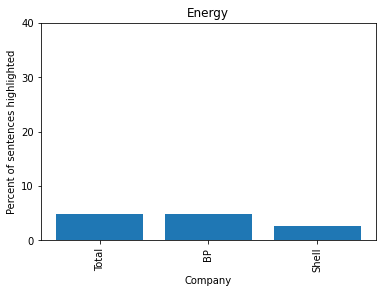

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import glob
y = []

x = ["Total", "BP", "Shell"]


i = 0

for file in os.listdir(dir):
    y.append(100 * (highlight_list[i])/sentences_list[i])
    i = i+1

plt.bar(x, y, width = 0.8)
plt.xticks(rotation='vertical')
plt.title("Energy")
plt.xlabel("Company")
plt.ylabel("Percent of sentences highlighted")
plt.yticks(np.arange(0, 50, 10))
plt.show()

In [14]:
import pandas as pd

series = pd.Series(y)
series.describe()

count    3.000000
mean     4.170358
std      1.301004
min      2.668090
25%      3.793999
50%      4.919908
75%      4.921493
max      4.923077
dtype: float64

In [15]:
#storing variable so they can be called between notebooks (for aggregate analysis, test/train data sets, and modeling later on)

Energy_reltext = rel_text
Energy_alltext = all_text

%store Energy_reltext
%store Energy_alltext

Stored 'Energy_reltext' (list)
Stored 'Energy_alltext' (list)


In [16]:
def extract_sentences(text):
    sentences = []
    for report in text:
        for sent in report:
            sentences.append(sent)
    return sentences

In [17]:
pd.DataFrame(extract_sentences(Energy_reltext)).to_csv("Energy_reltext.csv", encoding = 'utf-8-sig')

In [18]:
pd.DataFrame(extract_sentences(Energy_alltext)).to_csv("Energy_alltext.csv", encoding = 'utf-8-sig')